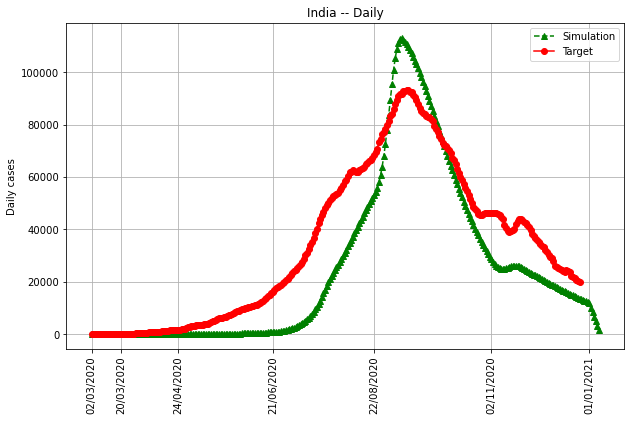

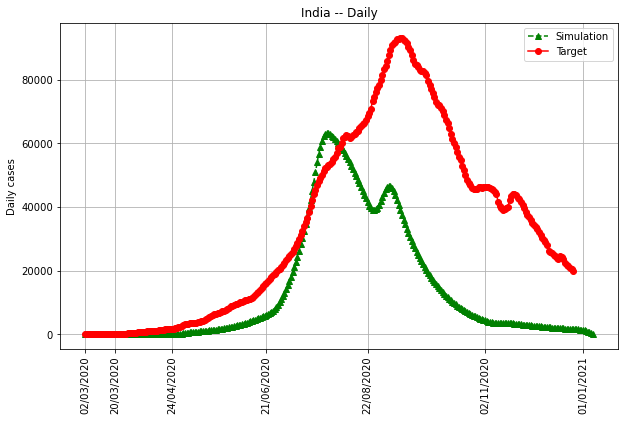

In [18]:
'''
This script compares the SUTRA model with two intial conditions. This script uses the parameters given in Table 1.
'''

import pandas as pd
import numpy as np
from datetime import datetime, date
import datetime
from matplotlib import pyplot as plt 

from sutra import create_plots

gamma = 0.1
p0 = 1350000000

# Run SUTRA model with a given initial condition.
def run_sutra_model_smooth_transitions_init_cond(phase_starts, drift_periods, betas, rhos, p0, gamma, t0):

    days_plot = (phase_starts[-1] - phase_starts[0]).days + 1
    
    s = np.zeros(days_plot, dtype = 'longdouble')
    u = np.zeros(days_plot, dtype = 'longdouble')
    t = np.zeros(days_plot, dtype = 'longdouble')
    ru = np.zeros(days_plot, dtype = 'longdouble')
    rt = np.zeros(days_plot, dtype = 'longdouble')
    
    NT = np.zeros(days_plot)
    T = np.zeros(days_plot)
    RT = np.zeros(days_plot)
    
    u[0] = t0*33/p0
    t[0] = t0/p0
    s[0] = 1-(u[0] + t[0] + ru[0] + rt[0])
    
    
    for i in range(len(betas)-1):
        drift_period_length = drift_periods[i]
                                  
        if i==0:
            c = 0
        else:
            init_index = phase_indices[-1]
            c = (t[init_index] + u[init_index]) + (rt[init_index] + ru[init_index]) - (1/epsilon)*(t[init_index] + rt[init_index])
        
        phase_length = (phase_starts[i+1] - phase_starts[i]).days
        cumulative_phase_length_previous = (phase_starts[i] - phase_starts[0]).days
        phase_indices = np.array([cumulative_phase_length_previous + k for k in range(1,phase_length+1)])
        count = 0
        for j in phase_indices:
            if ((i>0 and drift_period_length > 0) and count<=drift_period_length):
                beta = betas[i-1] * ((betas[i]/betas[i-1])**(count/drift_period_length))
                epsilon = 1/33
                rho = rhos[i-1]* ((rhos[i]/rhos[i-1])**(count/drift_period_length))
            else:
                beta = betas[i]
                epsilon = 1/33
                rho = rhos[i]    

            s[j] = s[j-1] - beta*s[j-1]*u[j-1]
            u[j] = u[j-1] + beta*s[j-1]*u[j-1] - epsilon*beta*s[j-1]*u[j-1] - gamma*u[j-1]
            t[j] = t[j-1] + epsilon*beta*s[j-1]*u[j-1] - gamma*t[j-1]
            ru[j] = ru[j-1] + gamma*u[j-1]
            rt[j] = rt[j-1] + gamma*t[j-1]
            
            count += 1
            T[j] = rho*p0*t[j]
            RT[j] = rho*p0*rt[j]
            
            rho_tilde = rho*epsilon*(1-c)
            beta_tilde = beta*(1-epsilon)*(1-c)
            NT[j]  = (T[j] - (1/(rho_tilde*p0))*((T[j] +RT[j] )*T[j] ))*beta_tilde
            
    return NT, T, RT

phase_starts = [date(2020,3,2), date(2020,3,20), date(2020,4,24), date(2020,6,21),date(2020,8,22),  date(2020,11,2), date(2021,1,1)]
drift_periods = np.array([5, 0, 5, 30, 10, 10,10])
betas = np.array([0.33, 0.26, 0.16, 0.16, 0.15, 0.21,0.23])
rhos = np.array([0.00001, 0.1, 4.0, 20, 40.3, 39.5,39.7])/100

NT, T, RT = run_sutra_model_smooth_transitions_init_cond(phase_starts, drift_periods, betas, rhos, p0, gamma, 1)
create_plots(phase_starts, date(2020,3,2), NT, 300)


NT, T, RT = run_sutra_model_smooth_transitions_init_cond(phase_starts, drift_periods, betas, rhos, p0, gamma, 10)
create_plots(phase_starts, date(2020,3,2), NT, 300)